In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms
from models.Model_1 import Model_1
from models.Model_2 import Model_2
from models.Model_3 import Model_3
from models.Model_4 import Model_4
from models.Model_5 import Model_5
from datetime import datetime
from utils import get_device, transform_data_to_numpy, printSampleImages
from torchsummary import summary
import os
from tqdm import tqdm
from torch.utils.data import Subset
import time
import matplotlib.pyplot as plt

In [2]:
dataset = datasets.MNIST('./data', train=True, download=True, transform=transforms.ToTensor())
data_numpy = transform_data_to_numpy(dataset, dataset.data)
mean = torch.mean(data_numpy)
std = torch.std(data_numpy)


[Train]
 - Numpy Shape: (28, 60000, 28)
 - Tensor Shape: torch.Size([28, 60000, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)


In [5]:
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transforms.ToTensor())
test_data_numpy = transform_data_to_numpy(test_dataset, test_dataset.data)
mean_test = torch.mean(test_data_numpy)
std_test = torch.std(test_data_numpy)

[Train]
 - Numpy Shape: (28, 10000, 28)
 - Tensor Shape: torch.Size([28, 10000, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1325)
 - std: tensor(0.3105)
 - var: tensor(0.0964)


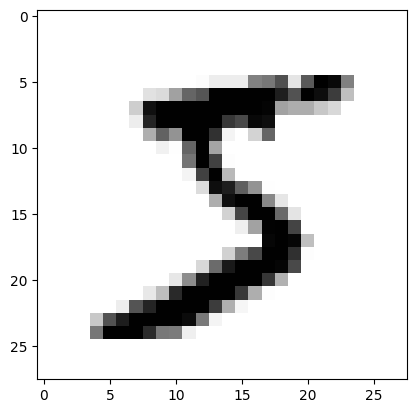

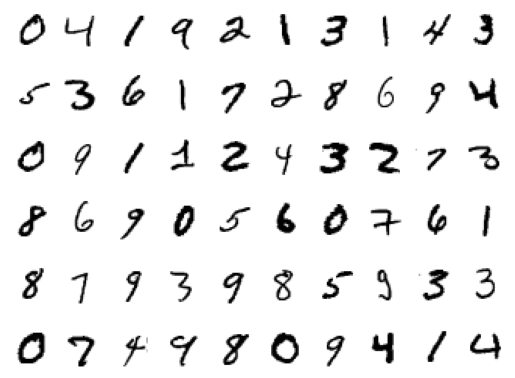

In [3]:
from utils import get_device, transform_data_to_numpy, printSampleImages

# Examing Data
printSampleImages(dataset)

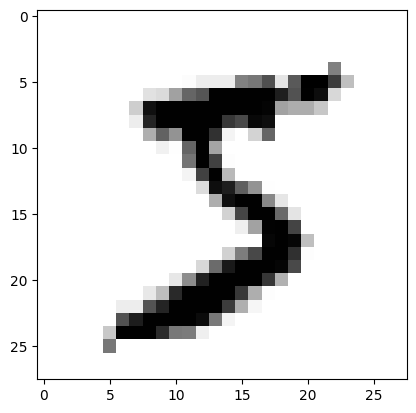

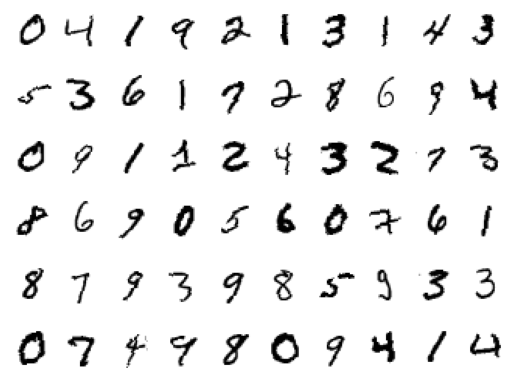

In [4]:
train_transform = transforms.Compose([
        transforms.RandomRotation((-10.0, 10.0), fill=(0,)),
        transforms.ToTensor(),
        transforms.Normalize((mean,), (std,))
    ])

# Examine data after augmentation
dataset = datasets.MNIST('./data', train=True, download=True, transform=train_transform)
printSampleImages(dataset)

In [6]:
model = Model_5().to('cpu')
# Print model summary
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
       BatchNorm2d-2            [-1, 8, 28, 28]              16
           Dropout-3            [-1, 8, 28, 28]               0
              ReLU-4            [-1, 8, 28, 28]               0
            Conv2d-5           [-1, 12, 28, 28]             876
       BatchNorm2d-6           [-1, 12, 28, 28]              24
           Dropout-7           [-1, 12, 28, 28]               0
              ReLU-8           [-1, 12, 28, 28]               0
         MaxPool2d-9           [-1, 12, 14, 14]               0
           Conv2d-10            [-1, 8, 16, 16]             104
           Conv2d-11            [-1, 8, 14, 14]             584
      BatchNorm2d-12            [-1, 8, 14, 14]              16
          Dropout-13            [-1, 8, 14, 14]               0
             ReLU-14            [-1, 8,

/Users/gitesh.grover/Study/.venv/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



[INFO] Using device: mps
[STEP 1/5] Preparing datasets...
[INFO] Dataloader arguments: {'shuffle': True, 'batch_size': 128, 'num_workers': 4, 'pin_memory': True}
[INFO] Total training batches: 469
[INFO] Batch size: 128
[INFO] Training samples: 60000
[INFO] Test samples: 10000

[INFO] Validation samples: 1000

[STEP 2/5] Initializing model...
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
       BatchNorm2d-2            [-1, 8, 28, 28]              16
           Dropout-3            [-1, 8, 28, 28]               0
              ReLU-4            [-1, 8, 28, 28]               0
            Conv2d-5           [-1, 12, 28, 28]             876
       BatchNorm2d-6           [-1, 12, 28, 28]              24
           Dropout-7           [-1, 12, 28, 28]               0
              ReLU-8           [-1, 12, 28, 28]               0
         MaxP

Epoch 1: 100%|██████████| 469/469 [00:08<00:00, 55.05it/s, loss=0.301, accuracy=90.33%]

[INFO] Training of Epoch 1 completed in 8.53 seconds
[INFO] Evaluating model...
Current learning rate: 0.1


Test Accuracy: 97.34%

[INFO] Training of Epoch 2 started...


Epoch 2: 100%|██████████| 469/469 [00:07<00:00, 66.43it/s, loss=0.109, accuracy=96.64%]

[INFO] Training of Epoch 2 completed in 17.30 seconds
[INFO] Evaluating model...
Current learning rate: 0.1


Test Accuracy: 98.18%

[INFO] Training of Epoch 3 started...


Epoch 3: 100%|██████████| 469/469 [00:07<00:00, 64.25it/s, loss=0.093, accuracy=97.17%]

[INFO] Training of Epoch 3 completed in 26.18 seconds
[INFO] Evaluating model...
Current learning rate: 0.1


Test Accuracy: 98.43%

[INFO] Training of Epoch 4 started...


Epoch 4: 100%|██████████| 469/469 [00:06<00:00, 67.29it/s, loss=0.082, accuracy=97.48%] 

[INFO] Training of Epoch 4 completed in 34.74 seconds
[INFO] Evaluating model...
Current learning rate: 0.1


Test Accuracy: 98.91%

[INFO] Training of Epoch 5 started...


Epoch 5: 100%|██████████| 469/469 [00:07<00:00, 65.96it/s, loss=0.074, accuracy=97.69%]

[INFO] Training of Epoch 5 completed in 43.45 seconds
[INFO] Evaluating model...
Current learning rate: 0.1


Test Accuracy: 99.01%

[INFO] Training of Epoch 6 started...


Epoch 6: 100%|██████████| 469/469 [00:06<00:00, 68.07it/s, loss=0.069, accuracy=97.86%] 

[INFO] Training of Epoch 6 completed in 51.94 seconds
[INFO] Evaluating model...
Current learning rate: 0.1


Test Accuracy: 98.89%

[INFO] Training of Epoch 7 started...


Epoch 7: 100%|██████████| 469/469 [00:07<00:00, 63.06it/s, loss=0.062, accuracy=98.05%]

[INFO] Training of Epoch 7 completed in 60.99 seconds
[INFO] Evaluating model...
Current learning rate: 0.1


Test Accuracy: 98.94%

[INFO] Training of Epoch 8 started...


Epoch 8: 100%|██████████| 469/469 [00:07<00:00, 64.22it/s, loss=0.061, accuracy=98.17%]

[INFO] Training of Epoch 8 completed in 69.88 seconds
[INFO] Evaluating model...
Current learning rate: 0.1


Test Accuracy: 99.18%

[INFO] Training of Epoch 9 started...


Epoch 9: 100%|██████████| 469/469 [00:06<00:00, 67.39it/s, loss=0.059, accuracy=98.14%]

[INFO] Training of Epoch 9 completed in 78.48 seconds
[INFO] Evaluating model...
Current learning rate: 0.1


Test Accuracy: 99.20%

[INFO] Training of Epoch 10 started...


Epoch 10: 100%|██████████| 469/469 [00:06<00:00, 67.24it/s, loss=0.060, accuracy=98.12%]

[INFO] Training of Epoch 10 completed in 87.12 seconds
[INFO] Evaluating model...
Current learning rate: 0.010000000000000002


Test Accuracy: 98.82%

[INFO] Training of Epoch 11 started...


Epoch 11: 100%|██████████| 469/469 [00:07<00:00, 65.37it/s, loss=0.045, accuracy=98.59%]

[INFO] Training of Epoch 11 completed in 95.94 seconds
[INFO] Evaluating model...
Current learning rate: 0.010000000000000002


Test Accuracy: 99.38%

[INFO] Training of Epoch 12 started...


Epoch 12: 100%|██████████| 469/469 [00:07<00:00, 66.60it/s, loss=0.042, accuracy=98.66%]

[INFO] Training of Epoch 12 completed in 104.63 seconds
[INFO] Evaluating model...
Current learning rate: 0.010000000000000002


Test Accuracy: 99.37%

[INFO] Training of Epoch 13 started...


Epoch 13: 100%|██████████| 469/469 [00:07<00:00, 66.39it/s, loss=0.039, accuracy=98.72%]

[INFO] Training of Epoch 13 completed in 113.33 seconds
[INFO] Evaluating model...
Current learning rate: 0.010000000000000002


Test Accuracy: 99.38%

[INFO] Training of Epoch 14 started...


Epoch 14: 100%|██████████| 469/469 [00:06<00:00, 69.38it/s, loss=0.040, accuracy=98.75%]

[INFO] Training of Epoch 14 completed in 121.73 seconds
[INFO] Evaluating model...
Current learning rate: 0.010000000000000002


Test Accuracy: 99.44%

[INFO] Training of Epoch 15 started...


Epoch 15: 100%|██████████| 469/469 [00:07<00:00, 65.15it/s, loss=0.041, accuracy=98.75%]

[INFO] Training of Epoch 15 completed in 130.54 seconds
[INFO] Evaluating model...
Current learning rate: 0.0010000000000000002


Test Accuracy: 99.44%

[STEP 4/5] Evaluating model against validation...
Test Accuracy: 99.50%

[STEP 5/5] Plot the training and testing losses...


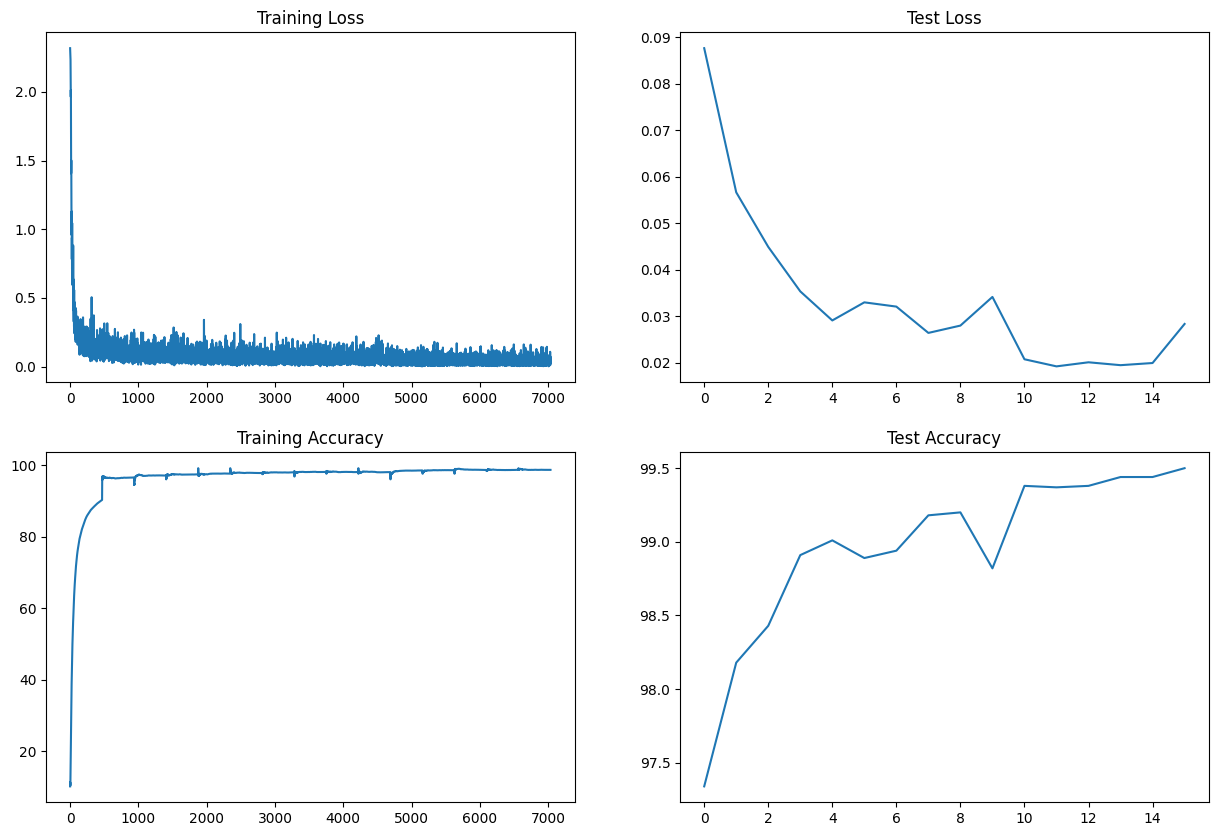

'model_mnist_20241222_204138.pth'

In [7]:
from train import train_and_test_model

train_and_test_model()